Loading data...
Loaded: 11175 cells × 58690 genes

Creating QC violin plots...


/home/vicky/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:961: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/home/vicky/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:961: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/home/vicky/miniconda3/envs/scrnaseq/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:961: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Saved: figures/01_qc_violin_by_condition.png


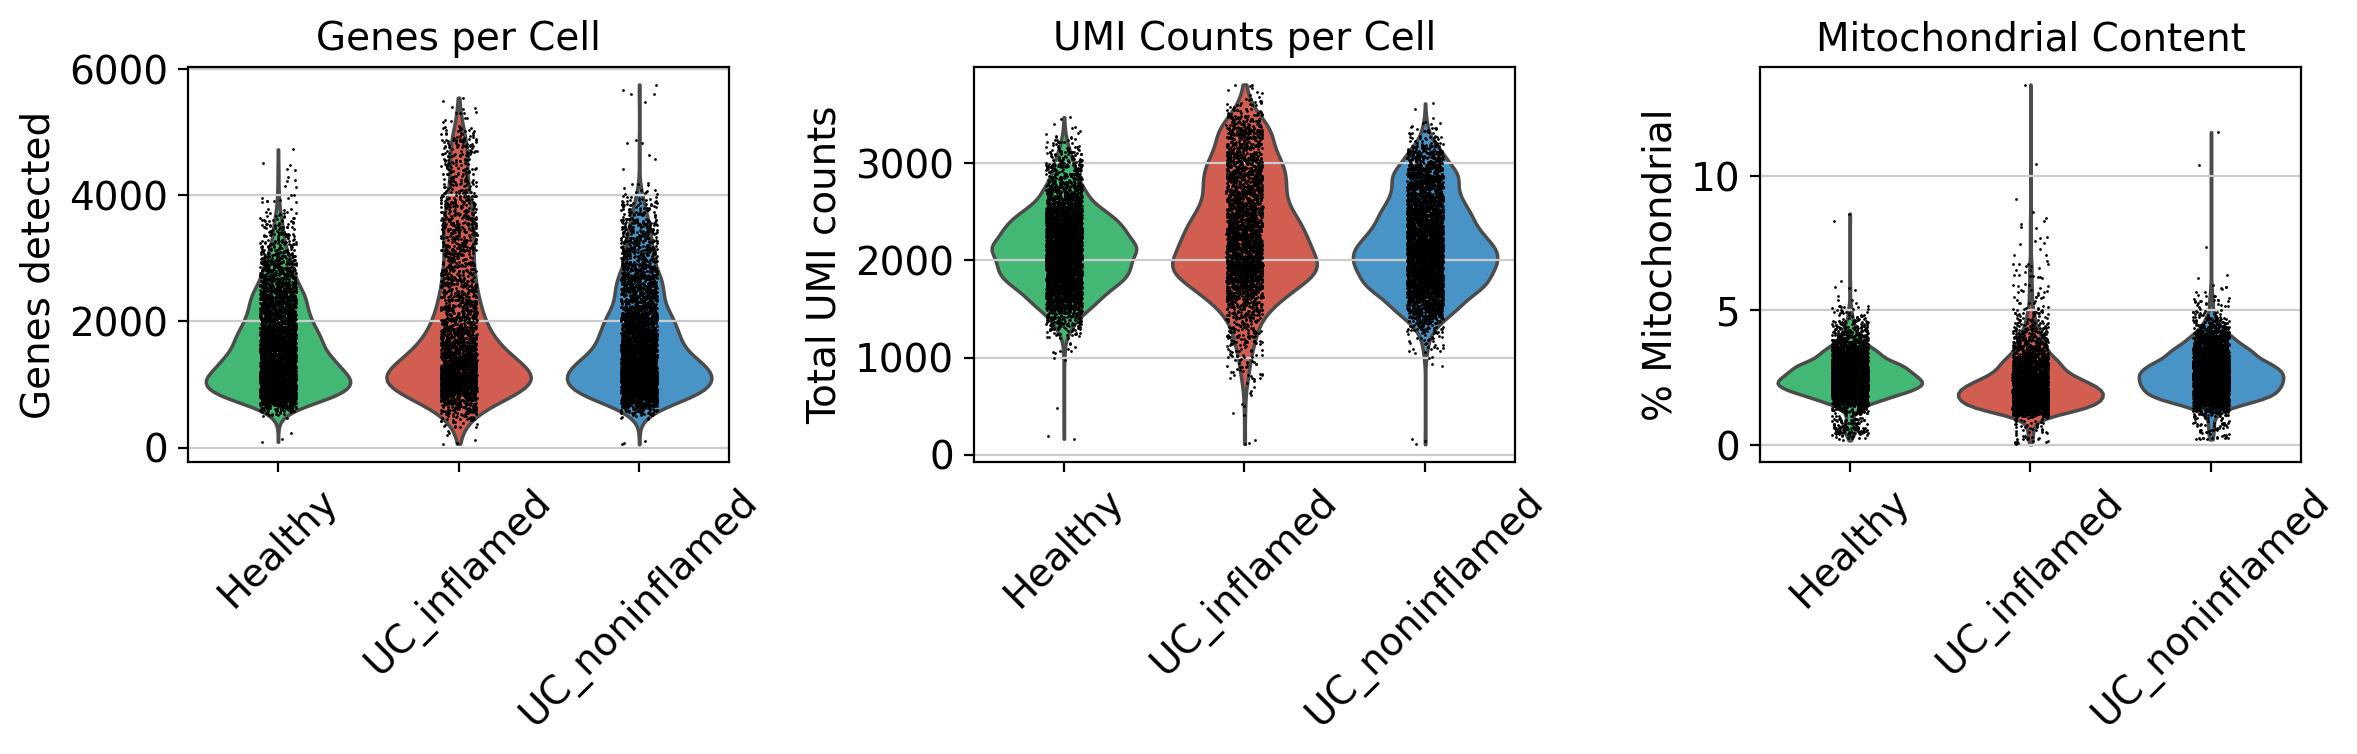


Creating QC scatter plots...
Saved: figures/02_qc_scatter.png


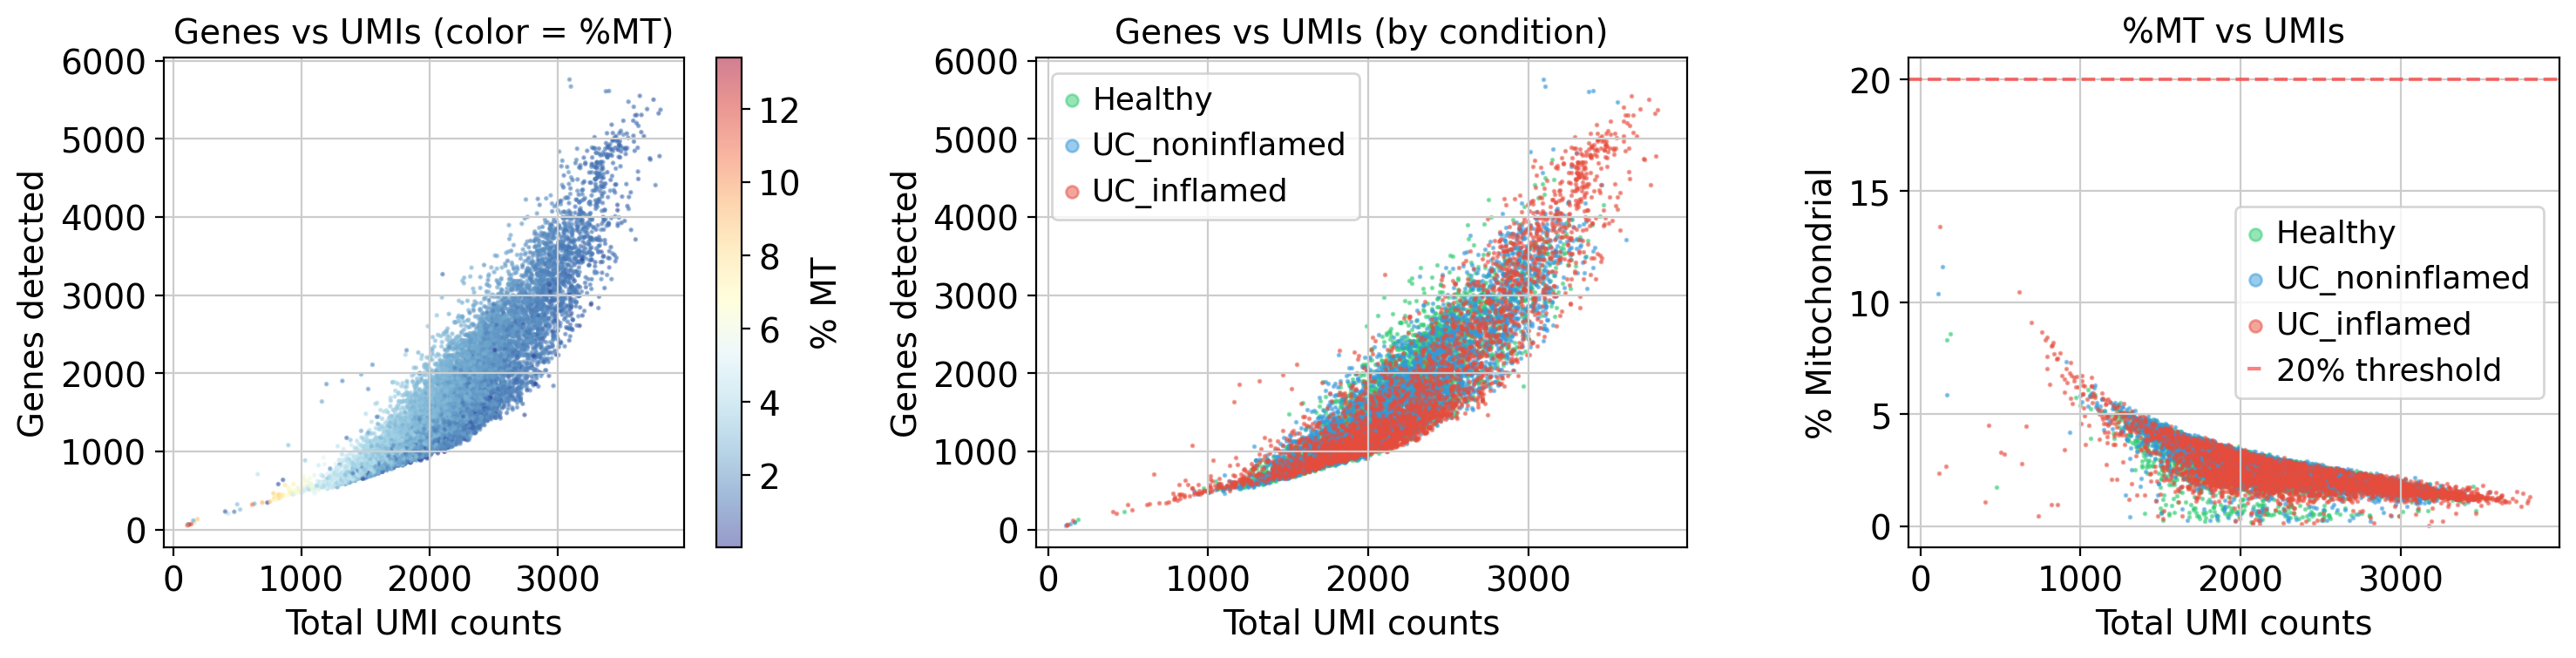


Creating sample-level QC plots...


/tmp/ipykernel_5554/3461010506.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_genes = adata.obs.groupby('sample')['n_genes_by_counts'].median().sort_values(ascending=False)
/tmp/ipykernel_5554/3461010506.py:185: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_mt = adata.obs.groupby('sample')['pct_counts_mt'].median().sort_values(ascending=False)


Saved: figures/03_qc_by_sample.png


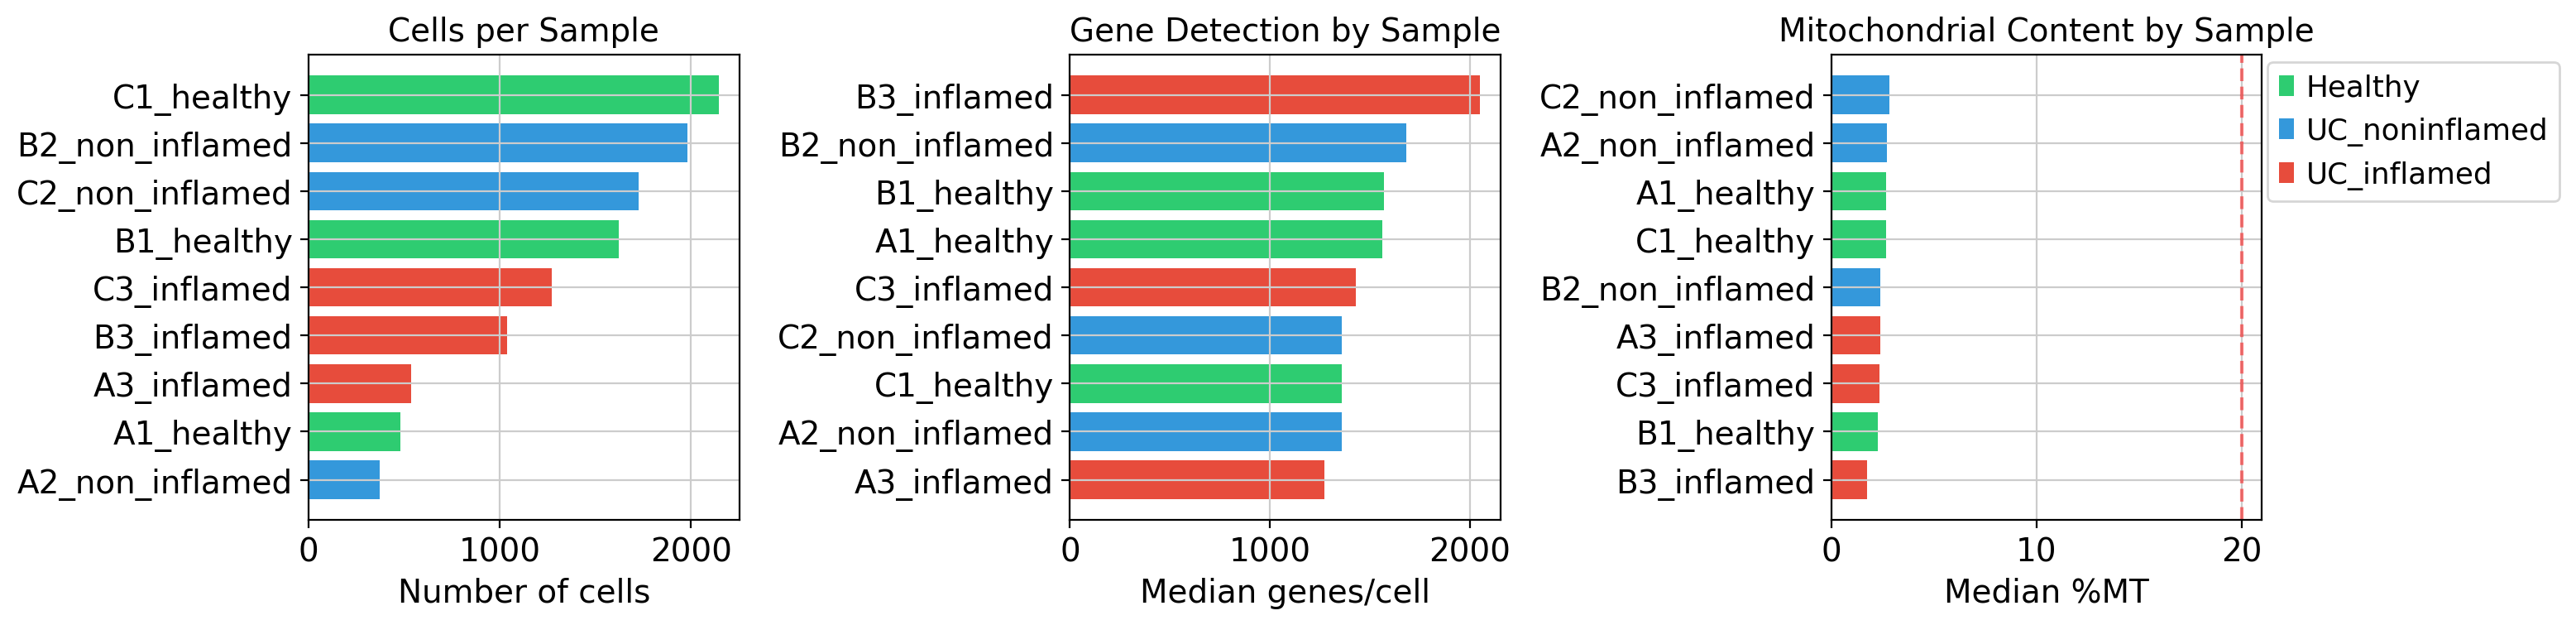


Creating distribution histograms...
Saved: figures/04_qc_histograms.png


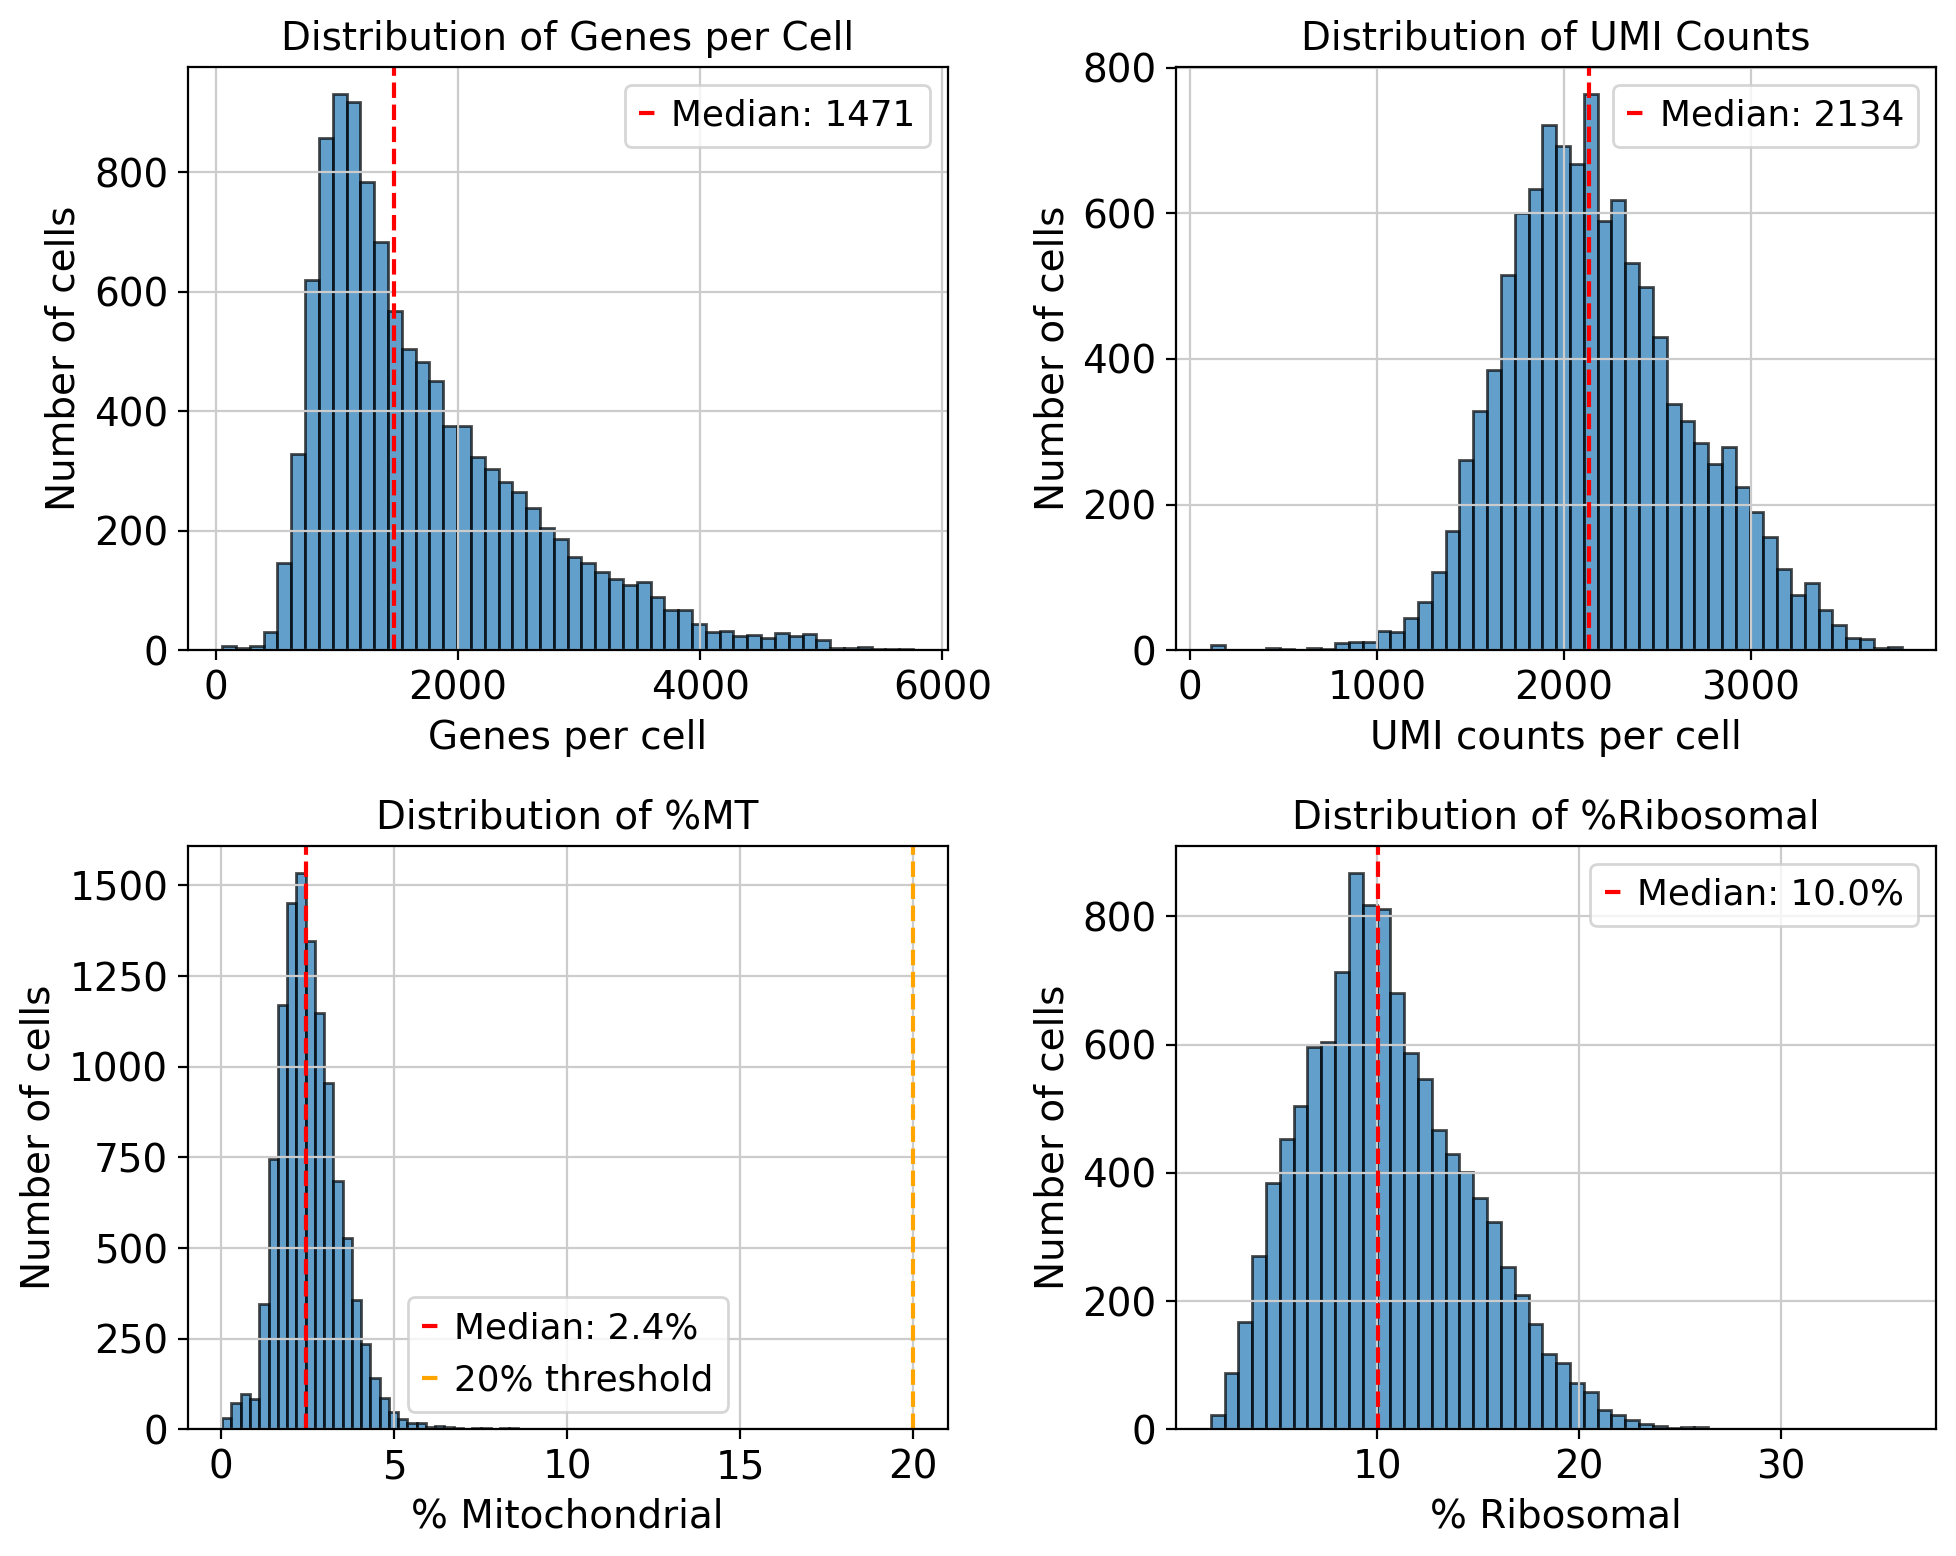


QC SUMMARY STATISTICS

--- Per Condition ---

Healthy (4249 cells):
  Genes/cell: 1451 (median), 1619 (mean)
  UMIs/cell:  2105 (median), 2117 (mean)
  %MT:        2.5% (median), 2.6% (mean)

UC_noninflamed (4078 cells):
  Genes/cell: 1482 (median), 1714 (mean)
  UMIs/cell:  2122 (median), 2175 (mean)
  %MT:        2.6% (median), 2.7% (mean)

UC_inflamed (2848 cells):
  Genes/cell: 1498 (median), 1944 (mean)
  UMIs/cell:  2230 (median), 2293 (mean)
  %MT:        2.1% (median), 2.4% (mean)

--- Filtering Recommendations ---
Cells with <200 genes (empty droplets?): 8 (0.1%)
Cells with >5000 genes (doublets?): 32 (0.3%)
Cells with >20% MT (dying cells?): 0 (0.0%)

--- Gene Statistics ---
Genes detected in 0 cells: 30687
Genes detected in <3 cells: 36081
Genes detected in >50% cells: 628

Figures saved to: figures


In [5]:
#!/usr/bin/env python3
"""
Week 1: QC Visualization for GSE116222
======================================

This script creates publication-quality QC plots.
Run after loading data with 02_load_gse116222_v2.py
"""

import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Settings
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi=100, facecolor='white', frameon=False)

# Paths
PROCESSED_DIR = Path("../data/processed")
FIGURES_DIR = Path("../figures")
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

# ==============================================================================
# Load Data
# ==============================================================================

print("Loading data...")
adata = sc.read_h5ad(PROCESSED_DIR / "GSE116222_raw.h5ad")
print(f"Loaded: {adata.n_obs} cells × {adata.n_vars} genes")

# ==============================================================================
# Figure 1: QC Violin Plots by Condition
# ==============================================================================

print("\nCreating QC violin plots...")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define consistent colors for conditions
condition_palette = {
    'Healthy': '#2ecc71',        # Green
    'UC_noninflamed': '#3498db', # Blue
    'UC_inflamed': '#e74c3c'     # Red
}

# Plot 1: Genes per cell
sc.pl.violin(
    adata, 
    keys='n_genes_by_counts',
    groupby='condition',
    rotation=45,
    ax=axes[0],
    show=False,
    palette=condition_palette
)
axes[0].set_ylabel('Genes detected')
axes[0].set_xlabel('')
axes[0].set_title('Genes per Cell')

# Plot 2: UMIs per cell
sc.pl.violin(
    adata,
    keys='total_counts',
    groupby='condition',
    rotation=45,
    ax=axes[1],
    show=False,
    palette=condition_palette
)
axes[1].set_ylabel('Total UMI counts')
axes[1].set_xlabel('')
axes[1].set_title('UMI Counts per Cell')

# Plot 3: Mitochondrial percentage
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    groupby='condition',
    rotation=45,
    ax=axes[2],
    show=False,
    palette=condition_palette
)
axes[2].set_ylabel('% Mitochondrial')
axes[2].set_xlabel('')
axes[2].set_title('Mitochondrial Content')

plt.tight_layout()
plt.savefig(FIGURES_DIR / "01_qc_violin_by_condition.png", dpi=150, bbox_inches='tight')
plt.savefig(FIGURES_DIR / "01_qc_violin_by_condition.pdf", bbox_inches='tight')
print(f"Saved: {FIGURES_DIR}/01_qc_violin_by_condition.png")
plt.show()

# ==============================================================================
# Figure 2: QC Scatter Plots
# ==============================================================================

print("\nCreating QC scatter plots...")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Genes vs UMIs (colored by %MT)
scatter1 = axes[0].scatter(
    adata.obs['total_counts'],
    adata.obs['n_genes_by_counts'],
    c=adata.obs['pct_counts_mt'],
    s=1,
    alpha=0.5,
    cmap='RdYlBu_r'
)
axes[0].set_xlabel('Total UMI counts')
axes[0].set_ylabel('Genes detected')
axes[0].set_title('Genes vs UMIs (color = %MT)')
plt.colorbar(scatter1, ax=axes[0], label='% MT')

# Plot 2: Genes vs UMIs (colored by condition)
for condition, color in condition_palette.items():
    mask = adata.obs['condition'] == condition
    axes[1].scatter(
        adata.obs.loc[mask, 'total_counts'],
        adata.obs.loc[mask, 'n_genes_by_counts'],
        c=color,
        s=1,
        alpha=0.5,
        label=condition
    )
axes[1].set_xlabel('Total UMI counts')
axes[1].set_ylabel('Genes detected')
axes[1].set_title('Genes vs UMIs (by condition)')
axes[1].legend(markerscale=5)

# Plot 3: %MT vs UMIs (colored by condition)
for condition, color in condition_palette.items():
    mask = adata.obs['condition'] == condition
    axes[2].scatter(
        adata.obs.loc[mask, 'total_counts'],
        adata.obs.loc[mask, 'pct_counts_mt'],
        c=color,
        s=1,
        alpha=0.5,
        label=condition
    )
axes[2].set_xlabel('Total UMI counts')
axes[2].set_ylabel('% Mitochondrial')
axes[2].set_title('%MT vs UMIs')
axes[2].axhline(y=20, color='red', linestyle='--', alpha=0.5, label='20% threshold')
axes[2].legend(markerscale=5)

plt.tight_layout()
plt.savefig(FIGURES_DIR / "02_qc_scatter.png", dpi=150, bbox_inches='tight')
print(f"Saved: {FIGURES_DIR}/02_qc_scatter.png")
plt.show()

# ==============================================================================
# Figure 3: Sample-level QC
# ==============================================================================

print("\nCreating sample-level QC plots...")

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Cells per sample
sample_counts = adata.obs['sample'].value_counts()
colors = [condition_palette[adata.obs[adata.obs['sample'] == s]['condition'].iloc[0]] 
          for s in sample_counts.index]

axes[0].barh(sample_counts.index, sample_counts.values, color=colors)
axes[0].set_xlabel('Number of cells')
axes[0].set_title('Cells per Sample')
axes[0].invert_yaxis()

# Median genes per sample
median_genes = adata.obs.groupby('sample')['n_genes_by_counts'].median().sort_values(ascending=False)
colors = [condition_palette[adata.obs[adata.obs['sample'] == s]['condition'].iloc[0]] 
          for s in median_genes.index]

axes[1].barh(median_genes.index, median_genes.values, color=colors)
axes[1].set_xlabel('Median genes/cell')
axes[1].set_title('Gene Detection by Sample')
axes[1].invert_yaxis()

# Median %MT per sample
median_mt = adata.obs.groupby('sample')['pct_counts_mt'].median().sort_values(ascending=False)
colors = [condition_palette[adata.obs[adata.obs['sample'] == s]['condition'].iloc[0]] 
          for s in median_mt.index]

axes[2].barh(median_mt.index, median_mt.values, color=colors)
axes[2].set_xlabel('Median %MT')
axes[2].set_title('Mitochondrial Content by Sample')
axes[2].axvline(x=20, color='red', linestyle='--', alpha=0.5)
axes[2].invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c, label=l) for l, c in condition_palette.items()]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.12, 0.9))

plt.tight_layout()
plt.savefig(FIGURES_DIR / "03_qc_by_sample.png", dpi=150, bbox_inches='tight')
print(f"Saved: {FIGURES_DIR}/03_qc_by_sample.png")
plt.show()

# ==============================================================================
# Figure 4: Distribution Histograms
# ==============================================================================

print("\nCreating distribution histograms...")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Genes per cell histogram
axes[0, 0].hist(adata.obs['n_genes_by_counts'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(adata.obs['n_genes_by_counts'].median(), color='red', linestyle='--', 
                   label=f"Median: {adata.obs['n_genes_by_counts'].median():.0f}")
axes[0, 0].set_xlabel('Genes per cell')
axes[0, 0].set_ylabel('Number of cells')
axes[0, 0].set_title('Distribution of Genes per Cell')
axes[0, 0].legend()

# UMIs per cell histogram
axes[0, 1].hist(adata.obs['total_counts'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(adata.obs['total_counts'].median(), color='red', linestyle='--',
                   label=f"Median: {adata.obs['total_counts'].median():.0f}")
axes[0, 1].set_xlabel('UMI counts per cell')
axes[0, 1].set_ylabel('Number of cells')
axes[0, 1].set_title('Distribution of UMI Counts')
axes[0, 1].legend()

# %MT histogram
axes[1, 0].hist(adata.obs['pct_counts_mt'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(adata.obs['pct_counts_mt'].median(), color='red', linestyle='--',
                   label=f"Median: {adata.obs['pct_counts_mt'].median():.1f}%")
axes[1, 0].axvline(20, color='orange', linestyle='--', label='20% threshold')
axes[1, 0].set_xlabel('% Mitochondrial')
axes[1, 0].set_ylabel('Number of cells')
axes[1, 0].set_title('Distribution of %MT')
axes[1, 0].legend()

# %Ribosomal histogram
axes[1, 1].hist(adata.obs['pct_counts_ribo'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(adata.obs['pct_counts_ribo'].median(), color='red', linestyle='--',
                   label=f"Median: {adata.obs['pct_counts_ribo'].median():.1f}%")
axes[1, 1].set_xlabel('% Ribosomal')
axes[1, 1].set_ylabel('Number of cells')
axes[1, 1].set_title('Distribution of %Ribosomal')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig(FIGURES_DIR / "04_qc_histograms.png", dpi=150, bbox_inches='tight')
print(f"Saved: {FIGURES_DIR}/04_qc_histograms.png")
plt.show()

# ==============================================================================
# Print Summary Statistics
# ==============================================================================

print("\n" + "="*60)
print("QC SUMMARY STATISTICS")
print("="*60)

print("\n--- Per Condition ---")
for condition in ['Healthy', 'UC_noninflamed', 'UC_inflamed']:
    mask = adata.obs['condition'] == condition
    subset = adata.obs[mask]
    print(f"\n{condition} ({mask.sum()} cells):")
    print(f"  Genes/cell: {subset['n_genes_by_counts'].median():.0f} (median), "
          f"{subset['n_genes_by_counts'].mean():.0f} (mean)")
    print(f"  UMIs/cell:  {subset['total_counts'].median():.0f} (median), "
          f"{subset['total_counts'].mean():.0f} (mean)")
    print(f"  %MT:        {subset['pct_counts_mt'].median():.1f}% (median), "
          f"{subset['pct_counts_mt'].mean():.1f}% (mean)")

print("\n--- Filtering Recommendations ---")
n_low_genes = (adata.obs['n_genes_by_counts'] < 200).sum()
n_high_genes = (adata.obs['n_genes_by_counts'] > 5000).sum()
n_high_mt = (adata.obs['pct_counts_mt'] > 20).sum()

print(f"Cells with <200 genes (empty droplets?): {n_low_genes} ({100*n_low_genes/adata.n_obs:.1f}%)")
print(f"Cells with >5000 genes (doublets?): {n_high_genes} ({100*n_high_genes/adata.n_obs:.1f}%)")
print(f"Cells with >20% MT (dying cells?): {n_high_mt} ({100*n_high_mt/adata.n_obs:.1f}%)")

print("\n--- Gene Statistics ---")
n_cells_per_gene = np.array((adata.X > 0).sum(axis=0)).flatten()
print(f"Genes detected in 0 cells: {(n_cells_per_gene == 0).sum()}")
print(f"Genes detected in <3 cells: {(n_cells_per_gene < 3).sum()}")
print(f"Genes detected in >50% cells: {(n_cells_per_gene > adata.n_obs * 0.5).sum()}")

print("\n" + "="*60)
print("Figures saved to:", FIGURES_DIR)
print("="*60)